In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("auto-mpg.data-original",delim_whitespace=True,names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [3]:
#try to complete the column with regression later?
df[df.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


In [4]:
df1 = df[~df.isna().any(axis=1)]
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [5]:
from sklearn.preprocessing import normalize,PolynomialFeatures

In [8]:
columns = ["cylinders","displacement","horsepower","weight","acceleration","model year","origin"]
X_0 = df1[columns]
X,norms = normalize(X_0,return_norm=True)
y = df1[["mpg"]]
X

array([[0.00227237, 0.08720228, 0.03692605, ..., 0.00340856, 0.01988326,
        0.00028405],
       [0.00215407, 0.09424049, 0.04442766, ..., 0.00309647, 0.0188481 ,
        0.00026926],
       [0.0023157 , 0.09204908, 0.04341938, ..., 0.00318409, 0.02026238,
        0.00028946],
       ...,
       [0.00173762, 0.05864478, 0.03649009, ..., 0.00503911, 0.03562127,
        0.00043441],
       [0.00152075, 0.04562258, 0.03003487, ..., 0.0070715 , 0.03117543,
        0.00038019],
       [0.00146781, 0.04366744, 0.03009017, ..., 0.00711889, 0.03009017,
        0.00036695]])

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [10]:
folds=5

lr = LinearRegression()
cv_results = pd.DataFrame(cross_validate(lr,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
cv_results.head()

,fit_time,score_time,test_max_error,train_max_error,test_r2,train_r2,test_explained_variance,train_explained_variance,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.002779,0.004115,-8.297323,-12.919234,0.843621,0.809043,0.846091,0.809043,-2.298902,-3.399340
1,0.002984,0.004135,-11.757950,-12.578091,0.688352,0.834903,0.781065,0.834903,-3.308547,-3.200404
2,0.003209,0.004370,-6.787094,-12.763284,0.830374,0.829005,0.880537,0.829005,-2.390341,-3.378650
3,0.003294,0.006024,-9.795682,-13.489397,0.806163,0.832519,0.816481,0.832519,-3.070388,-3.237997
4,0.003178,0.005682,-15.339422,-11.391655,0.078921,0.867775,0.434125,0.867775,-5.752886,-2.429113


0.64948632880159

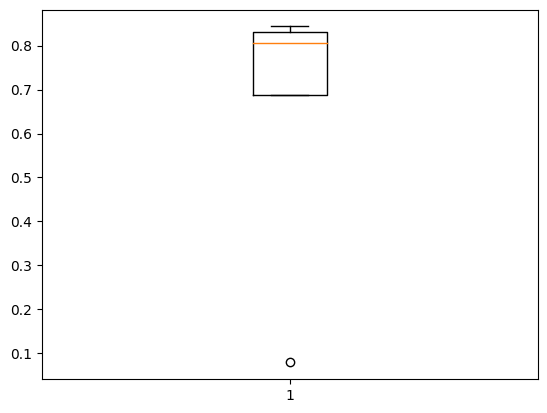

In [11]:
plt.boxplot(cv_results["test_r2"]);
(cv_results["test_r2"]).mean()

In [12]:
from sklearn.linear_model import Ridge,Lasso

In [13]:
folds = 3

In [26]:
import numpy as np
alphas = np.linspace(0.001,2,50)
alphas

array([1.00000000e-03, 4.17959184e-02, 8.25918367e-02, 1.23387755e-01,
       1.64183673e-01, 2.04979592e-01, 2.45775510e-01, 2.86571429e-01,
       3.27367347e-01, 3.68163265e-01, 4.08959184e-01, 4.49755102e-01,
       4.90551020e-01, 5.31346939e-01, 5.72142857e-01, 6.12938776e-01,
       6.53734694e-01, 6.94530612e-01, 7.35326531e-01, 7.76122449e-01,
       8.16918367e-01, 8.57714286e-01, 8.98510204e-01, 9.39306122e-01,
       9.80102041e-01, 1.02089796e+00, 1.06169388e+00, 1.10248980e+00,
       1.14328571e+00, 1.18408163e+00, 1.22487755e+00, 1.26567347e+00,
       1.30646939e+00, 1.34726531e+00, 1.38806122e+00, 1.42885714e+00,
       1.46965306e+00, 1.51044898e+00, 1.55124490e+00, 1.59204082e+00,
       1.63283673e+00, 1.67363265e+00, 1.71442857e+00, 1.75522449e+00,
       1.79602041e+00, 1.83681633e+00, 1.87761224e+00, 1.91840816e+00,
       1.95920408e+00, 2.00000000e+00])

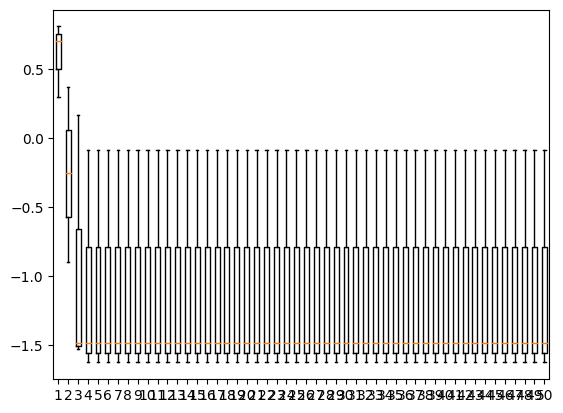

In [28]:
rmse = []
r2 = []
for al in alphas:
    la = Lasso(alpha=al)
    cv = pd.DataFrame(cross_validate(la,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt.boxplot(r2);

In [29]:
alphas[2]

0.08259183673469388

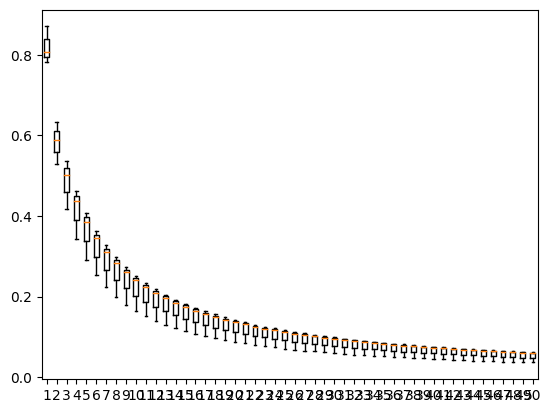

In [31]:
r2 = []
rmse = []
for al in alphas:
    ri = Ridge(alpha=al)
    cv = pd.DataFrame(cross_validate(ri,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["train_neg_root_mean_squared_error"])
    r2.append(cv["train_r2"])
plt.boxplot(r2);

0.6025534859655494


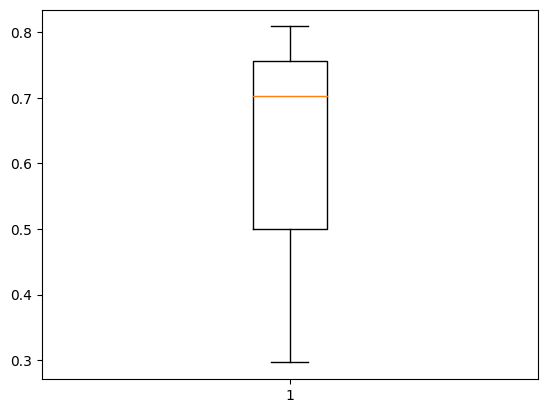

In [33]:
la = Lasso(alpha=0.001)
cv_la = pd.DataFrame(cross_validate(la,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))

plt.boxplot(cv_la["test_r2"]);
print((cv_la["test_r2"]).mean())

In [35]:
cv_la

,fit_time,score_time,test_max_error,train_max_error,test_r2,train_r2,test_explained_variance,train_explained_variance,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.004141,0.008276,-11.110676,-14.125474,0.702275,0.786295,0.782520,0.786295,-3.141037,-3.525276
1,0.004049,0.008121,-8.377744,-13.254415,0.809048,0.809979,0.856336,0.809979,-2.800741,-3.632854
2,0.004188,0.007825,-16.845919,-12.277590,0.296338,0.875707,0.652154,0.875707,-5.878216,-2.230610


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9)

In [51]:
alphas = np.linspace(0.00001,0.2,10)
alphas;

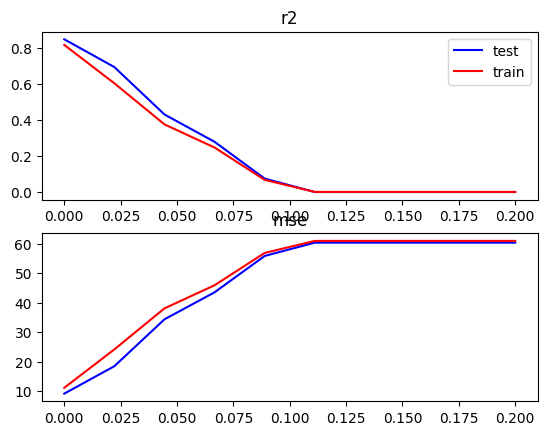

In [52]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_beta_size_1 = np.sum(np.abs(np.concatenate((lr.coef_[0],lr.intercept_))))

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []
betas = []

for al in alphas:
    la = Lasso(alpha=al)
    la.fit(X_train,y_train)
    
    y_test_pred = la.predict(X_test)
    y_train_pred= la.predict(X_train)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    betas.append(np.sum(np.abs(np.concatenate((la.coef_,la.intercept_))))/lr_beta_size_1)
    
results = pd.DataFrame({"train_r2":train_r2,"test_r2":test_r2,"test_mse":test_mse,"train_mse":train_mse,"alpha":alphas,"betas":betas})
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].plot(results["alpha"],results["test_r2"],label="test",color='blue');
ax[0].plot(results["alpha"],results["train_r2"],label="train",color='red');
ax[1].set_title("mse")
ax[1].plot(results["alpha"],results["test_mse"],label="test",color='blue');
ax[1].plot(results["alpha"],results["train_mse"],label="train",color='red');
ax[0].legend()

,train_r2,test_r2,test_mse,train_mse,alpha,betas
0,0.817451,0.848609,9.133671,11.128678,0.00001,0.901674


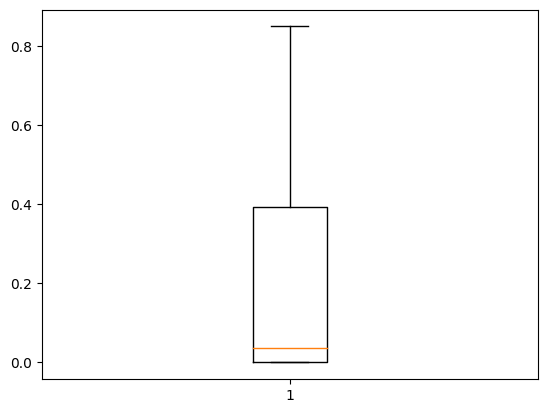

In [53]:
aux = "test_r2" #'test_mse'
plt.boxplot(results[aux]);
results[results[aux] == results[aux].max()]

In [54]:
#origin é 1. American, 2. European, 3. Japanese
la = Lasso(alpha=0.01)
la.fit(X,y)
for i in range(len(columns)):
    print(f"coef de {list(columns)[i]}:{la.coef_[i]} ")

coef de cylinders:0.0 
coef de displacement:-86.73305599331387 
coef de horsepower:-0.0 
coef de weight:0.0 
coef de acceleration:0.0 
coef de model year:569.9775390357921 
coef de origin:0.0 


In [55]:
la.intercept_

array([13.01421446])

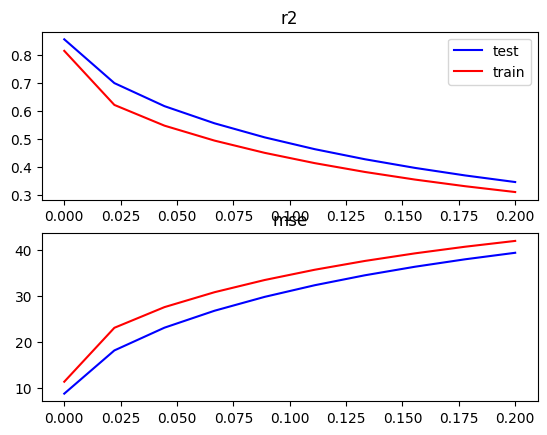

In [56]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_beta_size_2 = np.sum(np.square(np.concatenate((lr.coef_[0],lr.intercept_))))

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []
betas = []

for al in alphas:
    la = Ridge(alpha=al)
    la.fit(X_train,y_train)
    
    y_test_pred = la.predict(X_test)
    y_train_pred= la.predict(X_train)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    betas.append(np.sum(np.square(np.concatenate((la.coef_[0],la.intercept_))))/lr_beta_size_2)
    
results = pd.DataFrame({"train_r2":train_r2,"test_r2":test_r2,"test_mse":test_mse,"train_mse":train_mse,"alpha":alphas,"betas":betas})
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].plot(results["alpha"],results["test_r2"],label="test",color='blue');
ax[0].plot(results["alpha"],results["train_r2"],label="train",color='red');
ax[1].set_title("mse")
ax[1].plot(results["alpha"],results["test_mse"],label="test",color='blue');
ax[1].plot(results["alpha"],results["train_mse"],label="train",color='red');
ax[0].legend()

In [57]:
la.intercept_

array([23.09893309])

In [62]:
#origin é 1. American, 2. European, 3. Japanese
la = Ridge(alpha=0.0001)
la.fit(X,y)
for i in range(len(columns)):
    print(f"coef de {list(columns)[i]}:{la.coef_[0][i]} ")

coef de cylinders:-280.79536113541894 
coef de displacement:-29.845568403718 
coef de horsepower:-234.65040698877058 
coef de weight:-324.5578195990766 
coef de acceleration:-607.1905860808498 
coef de model year:962.9827856607469 
coef de origin:96.04448206812269 


In [63]:
from sklearn.linear_model import RidgeCV,LassoCV

In [64]:
la = LassoCV(cv=3,max_iter=10000,alphas=alphas,verbose=True);
la.fit(X,y);
print(la.score(X,y))
print(la.alpha_)

0.8323239182366231
1e-05


/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
..............................[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [65]:
la.coef_

array([-2069.62716337,  -118.36803078,  -363.88580287, -1994.50824723,
       -1038.13551495,  1041.50759025,   371.62576189])

In [73]:
ri = RidgeCV(cv=3,alphas=alphas);
ri.fit(X,y);
print(ri.score(X,y))
print(ri.alpha_)

0.8313215760717756
1e-05


In [71]:
la = LassoCV(cv=3,max_iter=10000,verbose=True,selection="cyclic",eps=0.0001);
la.fit(X,y);
print(la.score(X,y))
print(la.alpha_)

0.8322329158181345
1.3108735776960454e-05


/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [157]:
?LassoCV

Init signature:
LassoCV(
    *,
    eps=0.001,
    n_alphas=100,
    alphas=None,
    fit_intercept=True,
    precompute='auto',
    max_iter=1000,
    tol=0.0001,
    copy_X=True,
    cv=None,
    verbose=False,
    n_jobs=None,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Lasso linear model with iterative fitting along a regularization path.

See glossary entry for :term:`cross-validation estimator`.

The best model is selected by cross-validation.

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
eps : float, default=1e-3
    Length of the path. ``eps=1e-3`` means that
    ``alpha_min / alpha_max = 1e-3``.

n_alphas : int, default=100
    Number of alphas along the regularization path.

alphas : array-like, default=None
    List of alphas where to compute the models.
    If ``None`` alphas are set automatically.

fit_inter